In [2]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('../data/features_PCA.csv')

print(f'The data has {X.shape[0]} instances and {X.shape[1]} attributes.')

X = X.iloc[:, 3:]

X.head()

The data has 157204 instances and 70 attributes.


,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.952079,-3.226752,-2.967157,2.145655,-1.632306,0.363350,2.493061,-0.788393,-0.457812,-0.230807,...,0.019618,-0.041080,0.007772,-0.007347,0.044956,0.073336,0.004443,-0.004541,-0.009376,-0.028201
1,1.133324,-1.837271,-5.430438,3.751871,2.329311,-0.852762,1.643031,0.730145,0.201314,0.295305,...,0.031965,0.065913,-0.116422,-0.029772,0.176878,-0.023017,-0.093160,0.002432,-0.039665,0.029353
2,2.430532,-1.622379,-3.907653,-0.439335,0.425565,2.100938,-1.578021,1.523847,2.199869,-2.077087,...,-0.319570,0.054675,0.110796,1.015174,0.019998,-0.030400,0.001036,-0.095926,0.026413,0.077112
3,2.167724,-1.549538,-3.677498,-0.716768,1.090935,1.702585,-0.379080,-0.218086,2.200049,-0.124189,...,0.060410,0.046307,0.618688,0.526214,0.087061,0.112307,0.144897,-0.028031,0.141562,0.054665
4,0.793792,-4.220648,-0.568416,-2.827257,-1.212634,0.118109,-0.128906,-0.039326,1.646158,1.197245,...,-0.224590,-0.946697,-0.226386,-0.027487,1.090153,0.258577,0.163514,-0.068227,-0.078152,0.159700


### Compute t-SNE for 2D and 3D representation

In [4]:
from sklearn.manifold import TSNE

# # Initialize t-SNE with desired parameters
# tsne_2D = TSNE(n_components=2, random_state=42)  # You can adjust the number of components as needed

# # Fit and transform the data
# X_embedded_2D = tsne_2D.fit_transform(X)

# # Store the features:
# np.save('tSNE_2D.npy', X_embedded_2D)

X_embedded_2D = np.load('tSNE_2D.npy')

In [5]:
from sklearn.manifold import TSNE

# # Initialize t-SNE with desired parameters
# tsne_3D = TSNE(n_components=3, random_state=42)  # You can adjust the number of components as needed

# # Fit and transform the data
# X_embedded_3D = tsne_3D.fit_transform(X)

# # Store the features:
# np.save('tSNE_3D.npy', X_embedded_3D)

X_embedded_3D = np.load('tSNE_3D.npy')

### Compute a Gaussian Mixture Model for n_components (clusters) = 2

In [7]:
from sklearn.mixture import GaussianMixture

# Assuming 'X' is your data
gmm = GaussianMixture(n_components=2)  # K is the number of clusters
gmm.fit(X)

labels = gmm.predict(X)

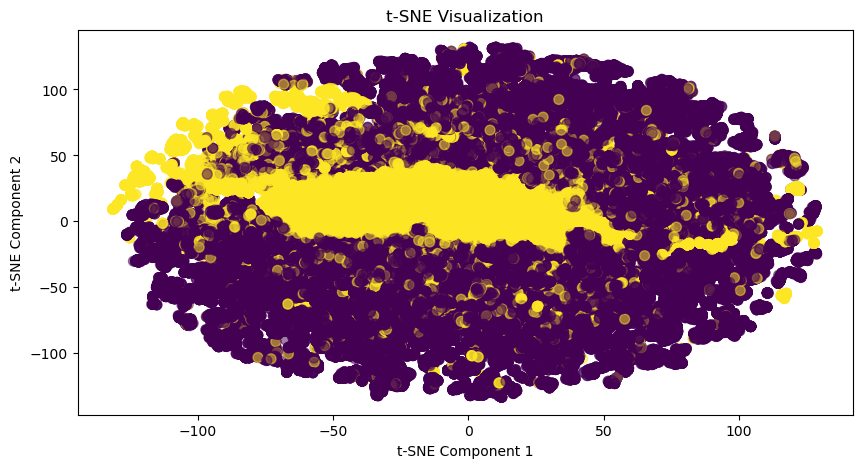

In [8]:
# Plot the embedded data points
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_2D[:, 0], X_embedded_2D[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
# plt.savefig('tSNE.png')
plt.show()

In [105]:
import plotly.graph_objs as go
import numpy as np

from sklearn.model_selection import train_test_split

X_show, _, y_show, _ = train_test_split(X_embedded_3D, labels, random_state=42, test_size=0.99)

# Separate data points based on labels
class_0_indices = y_show == 0
class_1_indices = y_show == 1

# Create the Scatter3d traces for each label
trace_class_0 = go.Scatter3d(
    x=X_show[class_0_indices, 0],
    y=X_show[class_0_indices, 1],
    z=X_show[class_0_indices, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
        color='red',  # Color for label 0
    ),
    name='Label 0'
)

trace_class_1 = go.Scatter3d(
    x=X_show[class_1_indices, 0],
    y=X_show[class_1_indices, 1],
    z=X_show[class_1_indices, 2],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
        color='blue',  # Color for label 1
    ),
    name='Label 1'
)

# Create the layout
layout = go.Layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace_class_0, trace_class_1], layout=layout)

# Display the plot
# fig.show()

### Compute k-Means clustering for K = 2

In [14]:
from sklearn.cluster import KMeans

# Initialize KMeans with k-means++ initialization for faster convergence
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Obtain cluster labels for each data point
labels = kmeans.labels_

# Obtain cluster centers
cluster_centers = kmeans.cluster_centers_

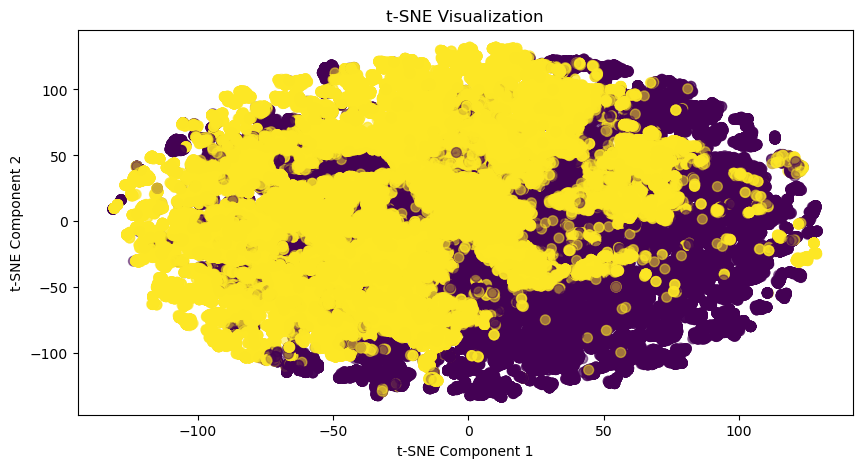

In [15]:
# Plot the embedded data points
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_2D[:, 0], X_embedded_2D[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
# plt.savefig('tSNE_kMeans.png')
plt.show()

### Now, plot with kPCA

In [6]:
from sklearn.mixture import GaussianMixture

# Assuming 'X' is your data
gmm = GaussianMixture(n_components=2)  # K is the number of clusters
gmm.fit(X)

labels = gmm.predict(X)

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your pandas DataFrame

# Standardize the data (optional but recommended for KPCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # Example with RBF kernel
X_kpca = kpca.fit_transform(X_scaled)

# Create a new DataFrame for the transformed data
df_kpca = pd.DataFrame(data=X_kpca, columns=['KPCA Component 1', 'KPCA Component 2'])

In [8]:
df_kpca.to_csv('../data/features_kPCA.csv', sep=',')

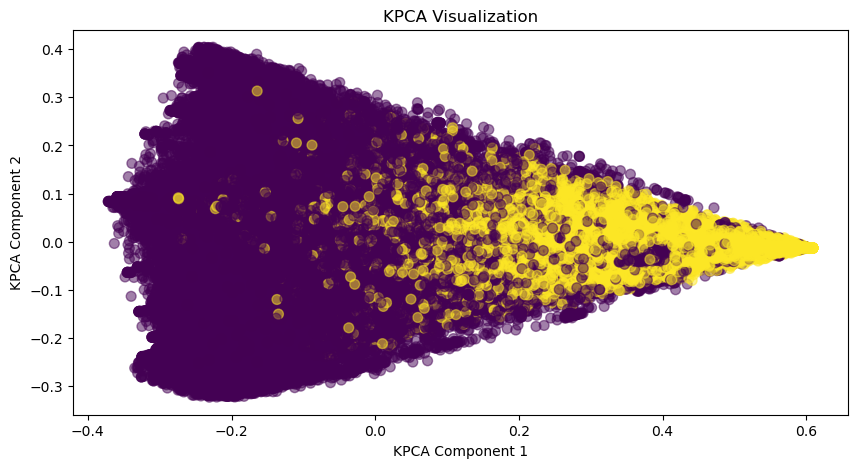

In [9]:
# Plot the embedded data points
plt.figure(figsize=(10, 5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('KPCA Component 1')
plt.ylabel('KPCA Component 2')
plt.title('KPCA Visualization')
# plt.savefig('tSNE_kMeans.png')
plt.show()